In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

In [40]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
price_data_file = os.path.join(parent_dir, 'data', 'price_data.csv')
hourly_consumption_file = os.path.join(parent_dir, 'data', 'hourly_consumption_data.csv')
individual_house_consumption_file = os.path.join(parent_dir, 'data', 'individual_houses.csv')
one_month_uninterupted = os.path.join(parent_dir, 'data', 'one_month_uninterupted.csv')


In [10]:
# tsv_file = hourly_consumption_file
# csv_file = 'hourly_consumption_data.csv'
# with open(tsv_file, 'r', newline='') as tsvfile:
#     with open(csv_file, 'w', newline='') as csvfile:
#         tsv_reader = csv.reader(tsvfile, delimiter='\t')
#         csv_writer = csv.writer(csvfile, delimiter=',')
#         for row in tsv_reader:
#             csv_writer.writerow(row)
            
# print("TSV to CSV conversion complete.")

TSV to CSV conversion complete.


In [14]:
# df = pd.read_csv('hourly_consumption_data.csv')
# filtered_data = df[df['Consumption'] >= 0]
# filtered_data.to_csv('hourly_consumption_data1.csv', index=False)

In [15]:
# data = pd.read_csv('hourly_consumption_data1.csv')
# data['Time'] = pd.to_datetime(data['Time'])
# data.set_index('Time', inplace=True)
# data['TimeDiff'] = data.index.to_series().diff()

# gaps = data[data['TimeDiff'] != pd.Timedelta(hours=1)].index

# # Get the longest continuous period
# if len(gaps) == 0:  # No gaps, so longest period is the whole dataset
#     start, end = data.index.min(), data.index.max()
# else:
#     gaps = pd.to_datetime(gaps)
#     start = [data.index.min()] + [gaps[i-1] for i in range(1, len(gaps))]
#     end = [gaps[i] for i in range(len(gaps)-1)] + [data.index.max()]
#     periods = pd.DataFrame({'Start': start, 'End': end})
#     periods['Length'] = periods['End'] - periods['Start']
#     longest_period = periods.loc[periods['Length'].idxmax()]

# print(longest_period)

Start     2017-10-20 10:00:00
End       2018-07-26 23:00:00
Length      279 days 13:00:00
Name: 13, dtype: object


### Creating a Neighbourhood

In [41]:
def create_individual_houses(df, num_houses=15, rel_std_dev=0.2):

    df_houses = pd.DataFrame()
    df_houses['Time'] = df['Time']
    
    for house in range(num_houses):
        # Create Gaussian random numbers with mean 0 and standard deviation
        # relative to the mean consumption
        rand_fluctuations = np.random.normal(0, df['Consumption'] * rel_std_dev)
        # Add the fluctuations to the mean consumption
        house_data = df['Consumption'] + rand_fluctuations
        # Make sure consumption is not negative
        house_data = house_data.clip(lower=0)
        df_houses[f'House {house+1} Consumption'] = house_data
        
    return df_houses

In [43]:
df = pd.read_csv(hourly_consumption_file)
df_houses = create_individual_houses(df)
df_houses.describe()
df_houses.to_csv('individual_houses.csv', index=False)

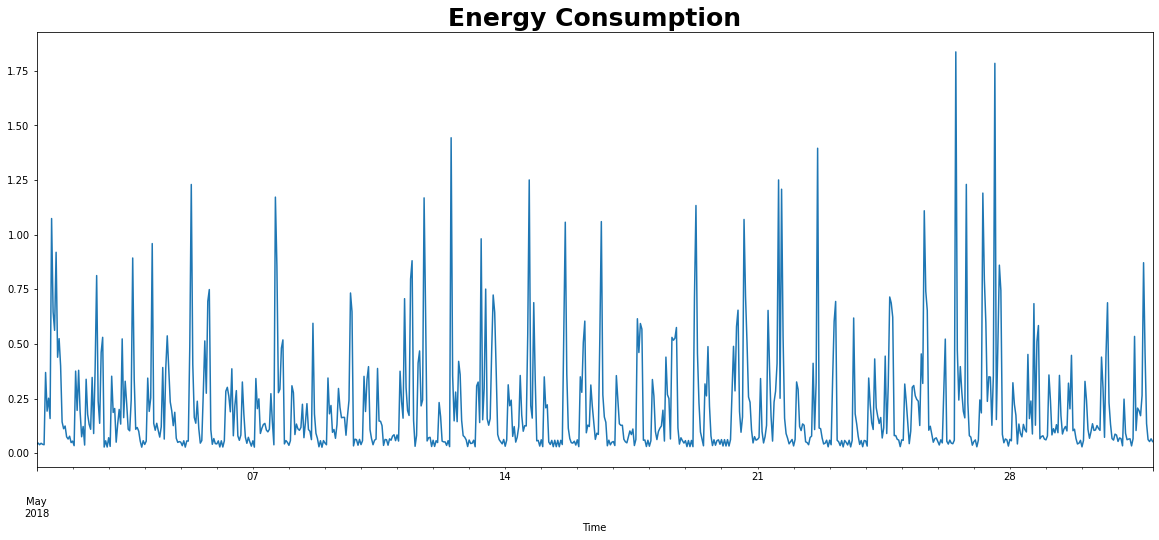

In [31]:
df = pd.read_csv(one_month_uninterupted)
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df['Consumption'].plot(figsize=(20,8))
plt.title('Energy Consumption', weight='bold', fontsize=25);

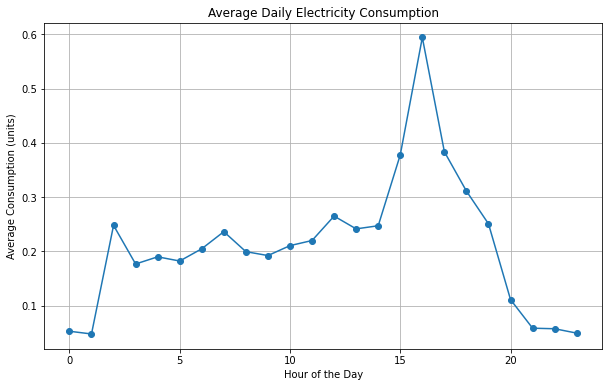

In [38]:
df = pd.read_csv(one_month_uninterupted)
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

# Group by the 'Hour' column and calculate the mean of 'Consumption'
average_day = df.groupby('Hour')['Consumption'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_day['Hour'], average_day['Consumption'], marker='o')
plt.title('Average Daily Electricity Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Consumption (units)')
plt.grid()
plt.show()


In [26]:
df = pd.read_csv(one_month_uninterupted)
df_monthly_houses = create_individual_houses(df)
df_monthly_houses


,Time,House 1 Consumption,House 2 Consumption,House 3 Consumption,House 4 Consumption,House 5 Consumption,House 6 Consumption,House 7 Consumption,House 8 Consumption,House 9 Consumption,House 10 Consumption,House 11 Consumption,House 12 Consumption,House 13 Consumption,House 14 Consumption,House 15 Consumption
0,2018-05-01 00:00:00,0.031900,0.036835,0.029164,0.036910,0.034156,0.033852,0.033757,0.044368,0.045733,0.042976,0.028444,0.040958,0.050619,0.032687,0.033151
1,2018-05-01 01:00:00,0.053426,0.053521,0.052972,0.036397,0.038731,0.027981,0.052646,0.031859,0.049314,0.056279,0.038805,0.037985,0.051130,0.036419,0.044550
2,2018-05-01 02:00:00,0.036206,0.052024,0.033597,0.037578,0.022944,0.031583,0.045601,0.041594,0.029695,0.039093,0.038225,0.039690,0.036010,0.032986,0.038000
3,2018-05-01 03:00:00,0.036479,0.045874,0.033881,0.039191,0.049973,0.043856,0.041069,0.036649,0.052742,0.046577,0.039521,0.047828,0.048530,0.030519,0.043733
4,2018-05-01 04:00:00,0.047266,0.036344,0.051552,0.029287,0.025856,0.039331,0.028127,0.045902,0.044826,0.040639,0.027775,0.031266,0.034950,0.037960,0.039848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,0.147937,0.152741,0.100460,0.101964,0.140660,0.133753,0.121438,0.084989,0.111317,0.157599,0.139047,0.100445,0.103091,0.078588,0.185229
740,2018-05-31 20:00:00,0.048194,0.069207,0.082425,0.080696,0.043814,0.066913,0.073868,0.070407,0.065647,0.088873,0.071428,0.079934,0.055689,0.071465,0.057575
741,2018-05-31 21:00:00,0.053454,0.051666,0.058068,0.043128,0.049971,0.050490,0.055564,0.059468,0.049616,0.052093,0.051073,0.054821,0.058382,0.042362,0.062138
742,2018-05-31 22:00:00,0.072915,0.060218,0.052334,0.094322,0.047651,0.057972,0.063776,0.071865,0.065428,0.065388,0.075461,0.055331,0.096926,0.051646,0.059680


In [27]:
df_monthly_houses.to_csv('houses_one_month_uninterupted.csv', index=False)

In [22]:
import json
import csv
import os
from datetime import datetime

In [8]:
def convert_json_to_csv(json_file, csv_file):
    with open(json_file, 'r') as file:
        data = json.load(file)

    if not data or "Prices" not in data:
        print("Invalid JSON data")
        return

    prices = data["Prices"]

    if not prices or not isinstance(prices, list):
        print("Invalid JSON data")
        return

    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)

        if len(prices) == 0:
            print("JSON data is empty")
            return

        # Write the header row based on the keys of the first object in the JSON data
        header = list(prices[0].keys())
        writer.writerow(header)

        # Write each object in the JSON data as a row in the CSV file
        for row in prices:
            writer.writerow(row.values())

In [9]:
json_file ='energyprices.json'
csv_file = 'energyprices.csv'


convert_json_to_csv(json_file, csv_file)

In [23]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

In [30]:
def convert_timestamp_format(timestamp):
    # Convert timestamp format from 'yyyy-mm-dd HH:MM:SS' to 'yyyy-mm-ddTHH:MM:SSZ'
    date_time = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ') 
    return date_time.strftime('%Y-%m-%d %H:%M:%S')

In [32]:
def merge_csv_with_prices(original_csv_file, prices_csv_file, merged_csv_file):
    # Read the original CSV file
    original_data = []
    with open(original_csv_file, 'r') as file:
        reader = csv.reader(file)
        original_header = next(reader)
        original_data = list(reader)

    # Read the prices CSV file
    prices_data = {}
    with open(prices_csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            timestamp = convert_timestamp_format(row['readingDate'])  # Use 'readingDate' instead of 'Time'
            price = row['price']
            prices_data[timestamp] = price

    # Merge the data based on the timestamp
    merged_data = []
    for row in original_data:
        timestamp = row[0]
        if timestamp in prices_data:
            price = prices_data[timestamp]
            merged_data.append(row + [price])
        else:
            merged_data.append(row + [""])

    # Write the merged data to the new CSV file
    with open(merged_csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(original_header + ['Price'])
        writer.writerows(merged_data)

In [34]:
for i in range(1, 16):
    original_csv_file = os.path.join(parent_dir, 'data', f'house{i}_cons_pred.csv')
    prices_csv_file = 'energyprices.csv'
    merged_csv_file = f'house{i}_cons_pred_price.csv'

    merge_csv_with_prices(original_csv_file, prices_csv_file, merged_csv_file)